[![Binder](https://mybinder.org/badge_logo.svg)](https://nbviewer.org/github/Sistemas-Multimedia/Sistemas-Multimedia.github.io/blob/master/contents/vector_quantization/VQ_grayscale_image.ipynb)

[![Colab](https://badgen.net/badge/Launch/on%20Google%20Colab/blue?icon=notebook)](https://colab.research.google.com/github/Sistemas-Multimedia/Sistemas-Multimedia.github.io/blob/master/contents/vector_quantization/VQ_grayscale_image.ipynb)


# Vector Quantization (in the 2D domain) of a color (RGB) image

See [K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans).

In [1]:
%%bash
if [ -d "$HOME/repos" ]; then
    echo "\"$HOME/repos\" exists"
else
    mkdir ~/repos
    echo Created $HOME/repos
fi

"/home/vruiz/repos" exists


In [2]:
%%bash
if [ -d "$HOME/repos/scalar_quantization" ]; then
    cd $HOME/repos/scalar_quantization
    echo "$HOME/repos/scalar_quantization ... "
    git pull 
else
    cd $HOME/repos
    git clone https://github.com/vicente-gonzalez-ruiz/scalar_quantization.git
fi

/home/vruiz/repos/scalar_quantization ... 
Ya está actualizado.


In [3]:
%%bash
if [ -d "$HOME/repos/image_IO" ]; then
    cd $HOME/repos/image_IO
    echo "$HOME/repos/image_IO ... "
    git pull 
else
    cd $HOME/repos
    git clone https://github.com/vicente-gonzalez-ruiz/image_IO.git
fi

/home/vruiz/repos/image_IO ... 
Ya está actualizado.


In [4]:
%%bash
if [ -d "$HOME/repos/MRVC" ]; then
    cd $HOME/repos/MRVC
    echo "$HOME/repos/MRVC ... "
    git pull 
else
    cd $HOME/repos
    git clone https://github.com/Sistemas-Multimedia/MRVC.git
fi

/home/vruiz/repos/MRVC ... 
Ya está actualizado.


In [5]:
!ln -sf ~/repos/information_theory/information.py .
!ln -sf ~/repos/information_theory/distortion.py .
!ln -sf ~/repos/image_IO/image_3.py .
!ln -sf ~/repos/image_IO/logging_config.py .

In [6]:
try:
    import matplotlib.pyplot as plt
except:
    !pip install matplotlib
    import matplotlib.pyplot as plt
%matplotlib inline

try:
    import scipy
except:
    !pip install scipy

import numpy as np

try:
    import cv2
except:
    !pip install opencv-python
    !pip install opencv-python-headless # Binder compatibility

try:
    from sklearn import cluster
except:
    !pip install sklearn
    from sklearn import cluster

import os
import pylab

try:
    import colored
except:
    !pip install colored

import image_1 as gray_image

try:
    import skimage
except:
    !pip install scikit-image
    import skimage
    
import distortion
import math
import image_3 as RGB_image

#!ln -sf ~/repos/DCT/color_DCT.py . # Does not work :-/
#import color_DCT as YUV
#!ln -sf ~/repos/YCrCb/YCrCb.py .
#import YCrCb as YUV
!ln -sf ~/repos/YCoCg/YCoCg.py .
import YCoCg as YUV
#!ln -sf ~/repos/RGB/RGB.py
#import RGB as YUV

import gzip
#import logging
#logger = logging.getLogger(__name__)
#logger.setLevel(logging.WARNING)

## Configuration

In [7]:
home = os.environ["HOME"]
fn = home + "/repos/MRVC/images/lena_color/"
block_side = 2
block_width = block_side
block_height = block_side
N_components = 3
n_clusters = 256  # Number of bins
N_tries = 3  # Number of times K-means is run
#range_of_N_bins = range(2, 256, 1)
range_of_N_bins = [1<<i for i in range(1, 8)]
#range_of_N_bins = [1<<i for i in range(1, 10)]

#RGB_image.write = RGB_image.debug_write # Faster, but lower compression
#RGB_image.write = RGB_image.write # The fastest, but returns only an estimation of the length

In [8]:
!cat logging_config.py

import logging
logging.basicConfig(format="[%(filename)s:%(lineno)s %(funcName)s() %(levelname)s] %(message)s")


## Read the image and show it

[image_3.py:41 read() INFO] /home/vruiz/repos/MRVC/images/lena_color/000.png (512, 512, 3) uint8 len=512673 max=255 min=1
[image_3.py:90 print_stats() INFO] component=0 max=255 min=54 avg=180.22401428222656
[image_3.py:90 print_stats() INFO] component=1 max=248 min=1 avg=99.05646133422852
[image_3.py:90 print_stats() INFO] component=2 max=239 min=8 avg=105.41263198852539


(512, 512, 3)


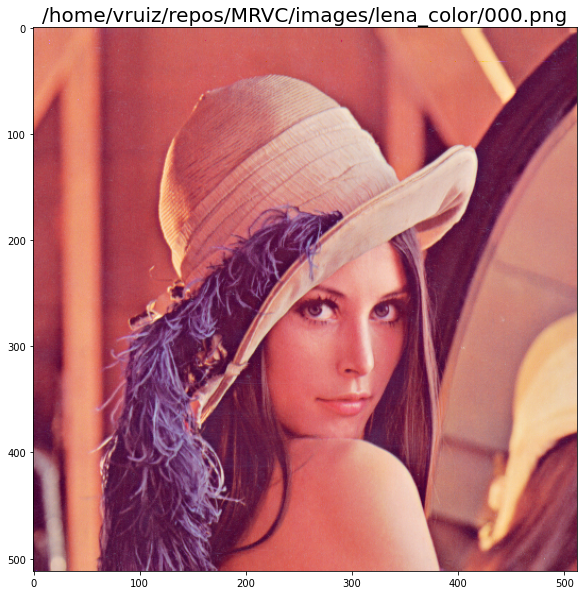

In [9]:
img = RGB_image.read(fn)
RGB_image.show(img, fn + "000.png")
print(img.shape)

## Example

In [10]:
block_width*block_height*N_components

12

In [11]:
block_length = block_width*block_height*N_components
np.random.seed(seed=1)  # makes the random numbers predictable
k_means = cluster.KMeans(init="k-means++", n_clusters=n_clusters, n_init=N_tries)
blocks = []
for i in range(0, img.shape[0], block_width):
    for j in range(0, img.shape[1], block_height):
        blocks.append(np.reshape(img[i:i + block_width, j:j + block_height], block_length))
blocks = np.asarray(blocks).astype(float)
k_means.fit(blocks)
centroids = k_means.cluster_centers_.squeeze().astype(np.uint8)  # the code-book
labels = k_means.labels_  # Labels of the centroids

labels = labels.reshape(img.shape[0]//block_height, img.shape[1]//block_width)
img_dequantized = np.empty_like(img)
for i in range(0, img.shape[0], block_width):
    for j in range(0, img.shape[1], block_height):
        img_dequantized[i:i + block_width, j:j + block_height] = centroids[labels[i//block_width,j//block_height]].reshape(block_height, block_width, N_components)

[image_3.py:90 print_stats() INFO] component=0 max=249 min=73 avg=179.71656799316406
[image_3.py:90 print_stats() INFO] component=1 max=221 min=10 avg=98.55593490600586
[image_3.py:90 print_stats() INFO] component=2 max=206 min=55 avg=104.9301986694336


centroids =
 [[219 110  94 ... 208  92  85]
 [104  39  83 ... 107  40  84]
 [225 188 171 ... 224 184 166]
 ...
 [208 104 105 ... 208 103 105]
 [105  21  57 ... 104  21  58]
 [191 159 166 ... 201 172 171]]
256 centroids (8 bits/block)
256x256 blocks (vectors) in the image
total number of output bytes = 65536


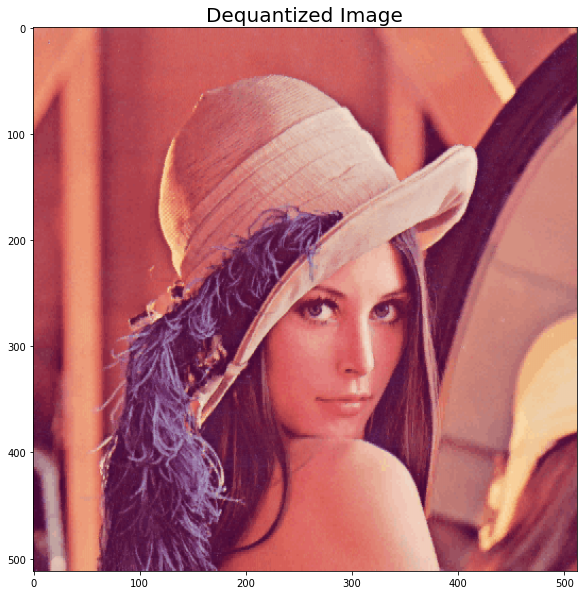

In [12]:
RGB_image.show(img_dequantized, "Dequantized Image")
assert len(centroids) == n_clusters
print("centroids =\n", centroids)
bits_per_block = int(math.log(n_clusters)/math.log(2))
print(f"{len(centroids)} centroids ({bits_per_block} bits/block)")
blocks_in_y = img.shape[0]//block_height
blocks_in_x = img.shape[1]//block_width
print(f"{blocks_in_y}x{blocks_in_x} blocks (vectors) in the image")
number_of_blocks = blocks_in_y*blocks_in_x
total_number_of_bits = number_of_blocks*bits_per_block
print(f"total number of output bytes = {total_number_of_bits//8}")

In [13]:
centroids.shape

(256, 12)

In [14]:
centroids.dtype

dtype('uint8')

## RD performance

ln: fallo al crear el enlace simbólico './information.py': El fichero ya existe


[image_3.py:90 print_stats() INFO] component=0 max=213 min=130 avg=179.86129760742188
[image_3.py:90 print_stats() INFO] component=1 max=133 min=47 avg=98.66351318359375
[image_3.py:90 print_stats() INFO] component=2 max=124 min=77 avg=105.08452606201172
[image_1.py:69 print_stats() INFO] max=313489.0 min=100152.0 avg=228311.75479125977
[image_1.py:46 write() INFO] Before optipng: 3631 bytes
[image_1.py:54 write() INFO] image_1.write: /tmp/2_000.png (256, 256) uint8 len=2764 max=1 min=0
[image_3.py:56 write() INFO] Before optipng: 82 bytes
[image_3.py:64 write() INFO] /tmp/codebook2_000.png (2, 4, 3) uint8 len=82 max=213 min=47


(2, 12)
len(centroids_energy) = 2
centroids_energy = [313489. 100152.]
argsort_centroids = [1 0]
[100152. 313489.]
Quantization indexes:  [0 1]
code-book length = 2
code-book size = 24
code-book bytes2 = 82


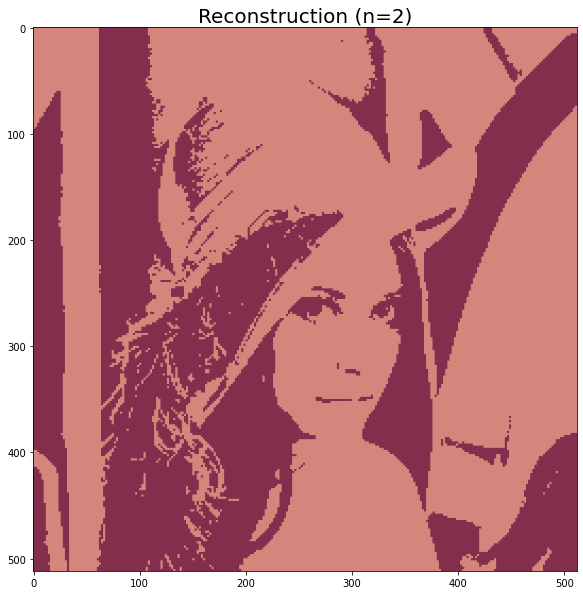

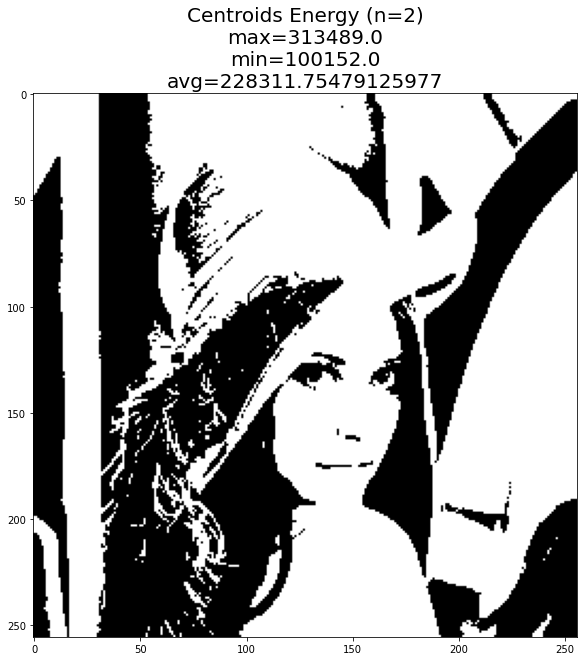

n=  2, rate=0.030619303385416668 bits/pixel, distortion=  28.2


[image_3.py:90 print_stats() INFO] component=0 max=229 min=101 avg=179.8121452331543
[image_3.py:90 print_stats() INFO] component=1 max=185 min=29 avg=98.40988540649414
[image_3.py:90 print_stats() INFO] component=2 max=163 min=69 avg=104.84933853149414
[image_1.py:69 print_stats() INFO] max=451569.0 min=64019.0 avg=233801.06297302246
[image_1.py:46 write() INFO] Before optipng: 7263 bytes


(4, 12)
len(centroids_energy) = 4
centroids_energy = [451569. 171581. 291296.  64019.]
argsort_centroids = [3 1 2 0]
[ 64019. 171581. 291296. 451569.]
Quantization indexes:  [0 1 2 3]


[image_1.py:54 write() INFO] image_1.write: /tmp/4_000.png (256, 256) uint8 len=5707 max=3 min=0
[image_3.py:56 write() INFO] Before optipng: 101 bytes
[image_3.py:64 write() INFO] /tmp/codebook4_000.png (4, 4, 3) uint8 len=101 max=229 min=29


code-book length = 4
code-book size = 48
code-book bytes2 = 101


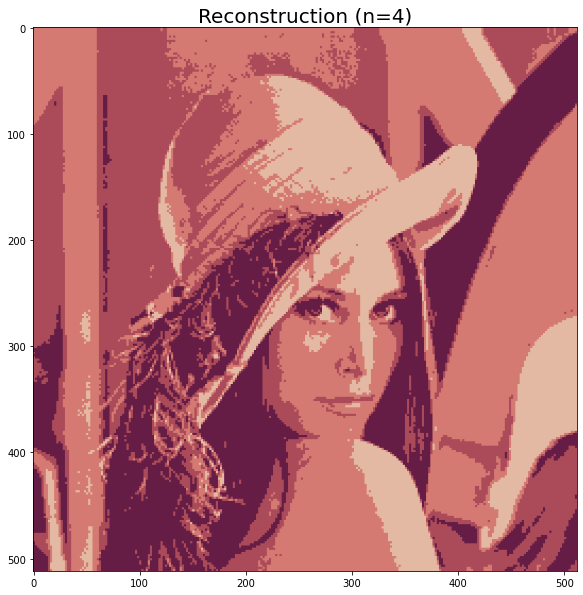

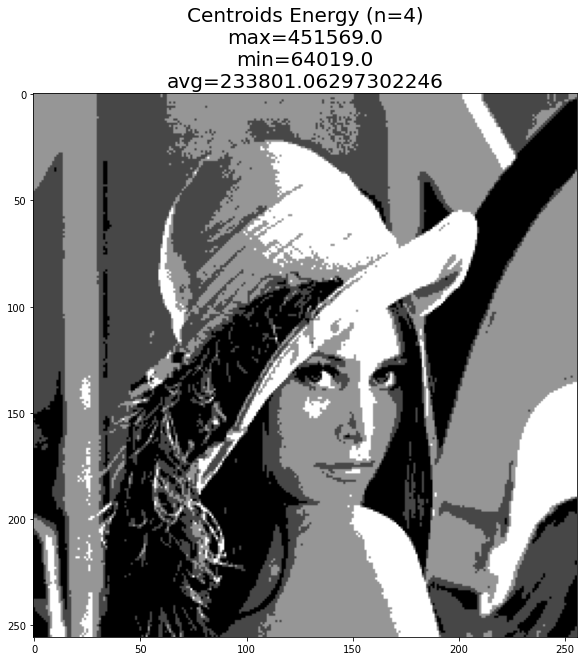

n=  4, rate=0.061136881510416664 bits/pixel, distortion=  17.7


[image_3.py:90 print_stats() INFO] component=0 max=232 min=94 avg=179.69346618652344
[image_3.py:90 print_stats() INFO] component=1 max=195 min=23 avg=98.6104850769043
[image_3.py:90 print_stats() INFO] component=2 max=171 min=65 avg=104.951171875
[image_1.py:69 print_stats() INFO] max=482730.0 min=54632.0 avg=235437.69551086426


(8, 12)
len(centroids_energy) = 8
centroids_energy = [162527. 372742. 208850.  54632. 482730. 241637. 102201. 299898.]
argsort_centroids = [3 6 0 2 5 7 1 4]
[ 54632. 102201. 162527. 208850. 241637. 299898. 372742. 482730.]
Quantization indexes:  [0 1 2 3 4 5 6 7]


[image_1.py:46 write() INFO] Before optipng: 11879 bytes
[image_1.py:54 write() INFO] image_1.write: /tmp/8_000.png (256, 256) uint8 len=10272 max=7 min=0
[image_3.py:56 write() INFO] Before optipng: 130 bytes
[image_3.py:64 write() INFO] /tmp/codebook8_000.png (8, 4, 3) uint8 len=130 max=232 min=23


code-book length = 8
code-book size = 96
code-book bytes2 = 130


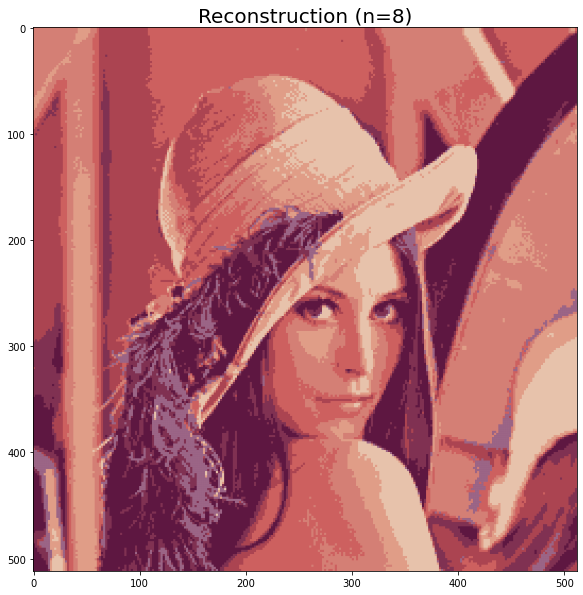

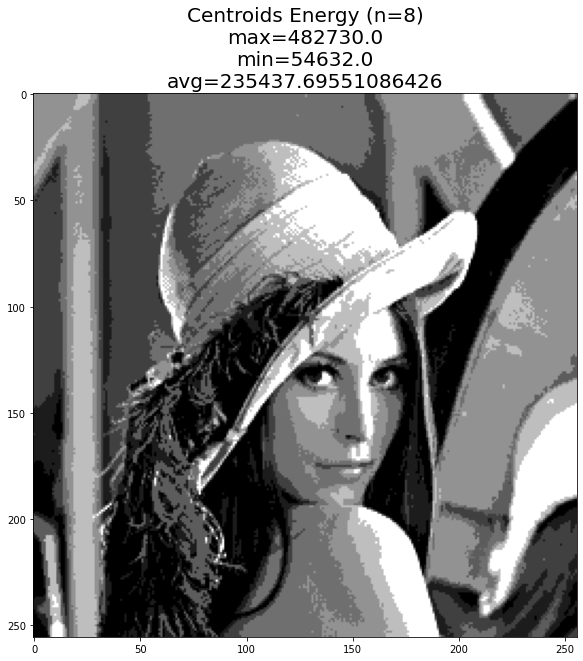

n=  8, rate=0.10845947265625 bits/pixel, distortion=  13.2


[image_3.py:90 print_stats() INFO] component=0 max=242 min=89 avg=179.6780548095703
[image_3.py:90 print_stats() INFO] component=1 max=199 min=20 avg=98.59807586669922
[image_3.py:90 print_stats() INFO] component=2 max=182 min=63 avg=104.89910125732422
[image_1.py:69 print_stats() INFO] max=498969.0 min=49738.0 avg=236136.84713745117
[image_1.py:46 write() INFO] Before optipng: 16753 bytes


(16, 12)
len(centroids_energy) = 16
centroids_energy = [399104. 165004. 223212.  49738. 304187. 482372. 136812. 273001. 237725.
 317320.  72665. 127020. 233689. 370700. 115244. 498969.]
argsort_centroids = [ 3 10 14 11  6  1  2 12  8  7  4  9 13  0  5 15]
[ 49738.  72665. 115244. 127020. 136812. 165004. 223212. 233689. 237725.
 273001. 304187. 317320. 370700. 399104. 482372. 498969.]
Quantization indexes:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


[image_1.py:54 write() INFO] image_1.write: /tmp/16_000.png (256, 256) uint8 len=13988 max=15 min=0
[image_3.py:56 write() INFO] Before optipng: 224 bytes
[image_3.py:64 write() INFO] /tmp/codebook16_000.png (16, 4, 3) uint8 len=223 max=242 min=20


code-book length = 16
code-book size = 192
code-book bytes2 = 223


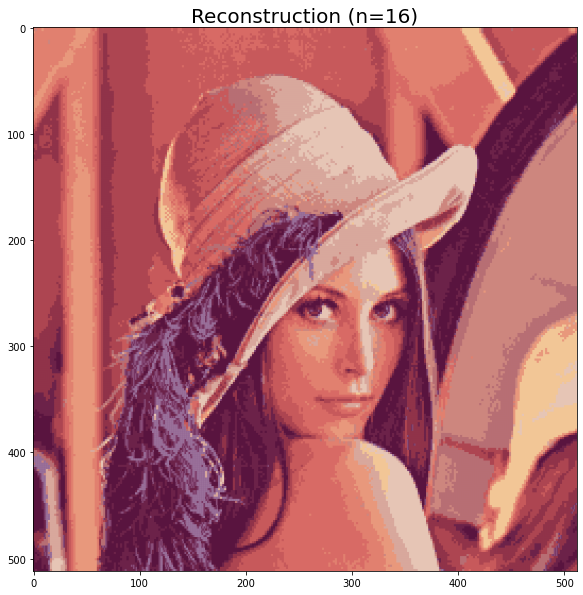

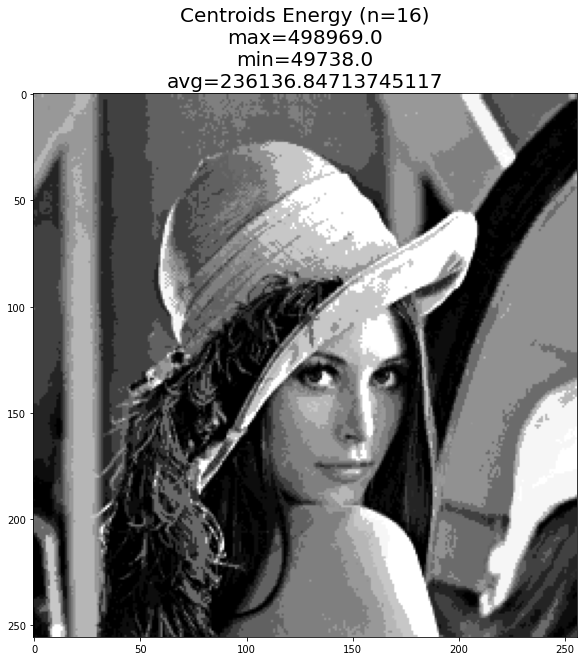

n= 16, rate=0.14909871419270834 bits/pixel, distortion=  10.6


[image_3.py:90 print_stats() INFO] component=0 max=243 min=84 avg=179.7127342224121
[image_3.py:90 print_stats() INFO] component=1 max=204 min=16 avg=98.4775276184082
[image_3.py:90 print_stats() INFO] component=2 max=189 min=61 avg=104.90373992919922
[image_1.py:69 print_stats() INFO] max=528372.0 min=44198.0 avg=236496.7279663086


(32, 12)
len(centroids_energy) = 32
centroids_energy = [166257. 270551. 464230. 108404.  44198. 246961. 238744. 165827. 370982.
 407571. 278989. 284817.  73284. 103697. 297706. 436366.  77506. 323555.
 321213. 202521. 528372. 147910. 369048. 244041. 503784. 135164.  56788.
 117476. 186052. 327519. 198108. 246100.]
argsort_centroids = [ 4 26 12 16 13  3 27 25 21  7  0 28 30 19  6 23 31  5  1 10 11 14 18 17
 29 22  8  9 15  2 24 20]
[ 44198.  56788.  73284.  77506. 103697. 108404. 117476. 135164. 147910.
 165827. 166257. 186052. 198108. 202521. 238744. 244041. 246100. 246961.
 270551. 278989. 284817. 297706. 321213. 323555. 327519. 369048. 370982.
 407571. 436366. 464230. 503784. 528372.]
Quantization indexes:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]


[image_1.py:46 write() INFO] Before optipng: 23951 bytes
[image_1.py:54 write() INFO] image_1.write: /tmp/32_000.png (256, 256) uint8 len=19669 max=31 min=0
[image_3.py:56 write() INFO] Before optipng: 380 bytes
[image_3.py:64 write() INFO] /tmp/codebook32_000.png (32, 4, 3) uint8 len=368 max=243 min=16


code-book length = 32
code-book size = 384
code-book bytes2 = 368


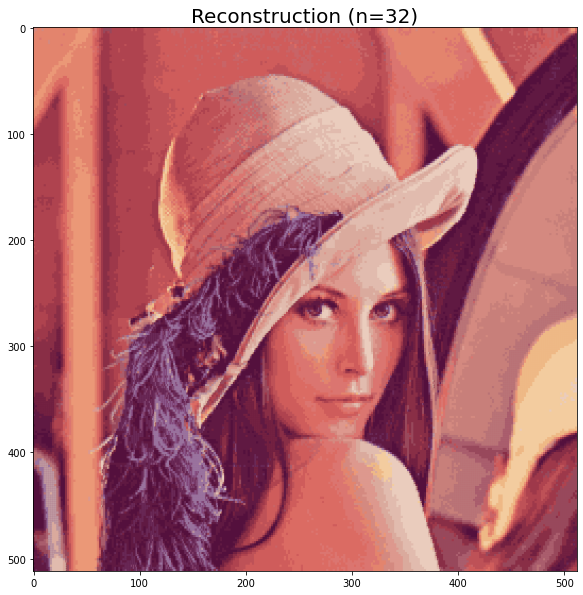

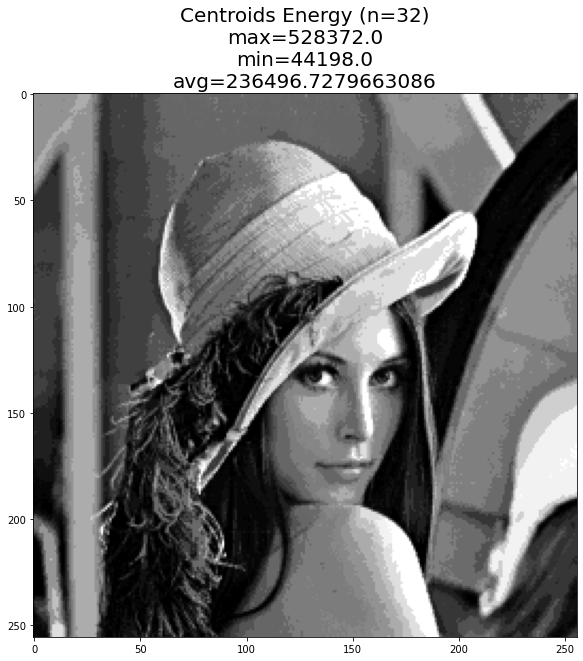

n= 32, rate=0.21131388346354166 bits/pixel, distortion=   8.9


[image_3.py:90 print_stats() INFO] component=0 max=243 min=79 avg=179.71631622314453
[image_3.py:90 print_stats() INFO] component=1 max=208 min=14 avg=98.54729461669922
[image_3.py:90 print_stats() INFO] component=2 max=193 min=59 avg=104.9036979675293
[image_1.py:69 print_stats() INFO] max=544743.0 min=39791.0 avg=236785.0963897705
[image_1.py:46 write() INFO] Before optipng: 32767 bytes


(64, 12)
len(centroids_energy) = 64
centroids_energy = [137977. 332373.  51956. 544743. 235104. 269648. 402878. 286040. 147341.
 430603. 349233.  93650. 179811. 258912. 196427. 177138. 244733. 159513.
 487400. 488575. 127689.  93289. 379664. 204810.  49269. 243179.  59490.
 409479. 231121. 361596. 324646. 335527. 160354. 121218.  97703. 216705.
 273973. 121300. 315981. 232581. 153828. 280261.  70519. 158927. 300903.
 106993. 263825. 517331.  67631.  73586. 360930. 182650. 140960.  39791.
 298312. 315549.  85345. 275060. 450056. 369848. 216920. 201102. 113483.
 237177.]
argsort_centroids = [53 24  2 26 48 42 49 56 21 11 34 45 62 33 37 20  0 52  8 40 43 17 32 15
 12 51 14 61 23 35 60 28 39  4 63 25 16 13 46  5 36 57 41  7 54 44 55 38
 30  1 31 10 50 29 59 22  6 27  9 58 18 19 47  3]
[ 39791.  49269.  51956.  59490.  67631.  70519.  73586.  85345.  93289.
  93650.  97703. 106993. 113483. 121218. 121300. 127689. 137977. 140960.
 147341. 153828. 158927. 159513. 160354. 177138. 179811. 18265

[image_1.py:54 write() INFO] image_1.write: /tmp/64_000.png (256, 256) uint8 len=25963 max=63 min=0
[image_3.py:56 write() INFO] Before optipng: 744 bytes
[image_3.py:64 write() INFO] /tmp/codebook64_000.png (64, 4, 3) uint8 len=727 max=243 min=14


code-book length = 64
code-book size = 768
code-book bytes2 = 727


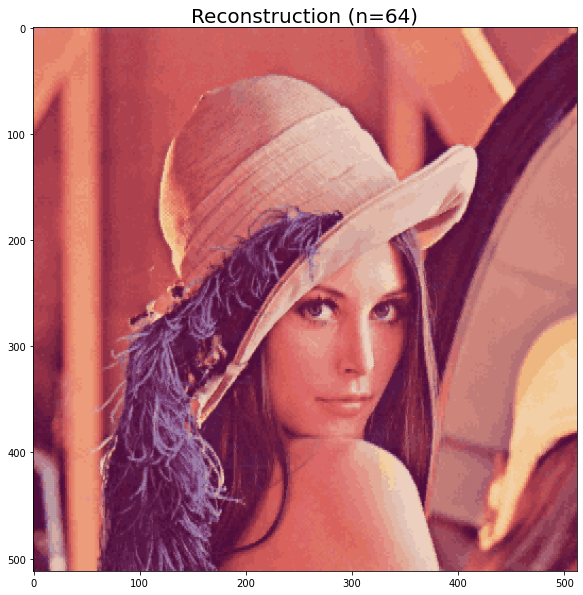

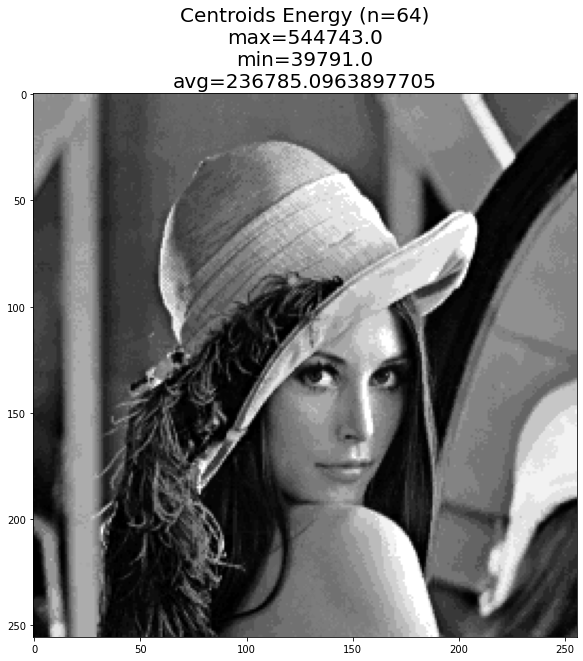

n= 64, rate=0.2862955729166667 bits/pixel, distortion=   7.8


[image_3.py:90 print_stats() INFO] component=0 max=249 min=76 avg=179.71539688110352
[image_3.py:90 print_stats() INFO] component=1 max=215 min=11 avg=98.57604217529297
[image_3.py:90 print_stats() INFO] component=2 max=200 min=55 avg=104.91068649291992
[image_1.py:69 print_stats() INFO] max=568870.0 min=36174.0 avg=236967.65997314453
[image_1.py:46 write() INFO] Before optipng: 44162 bytes


(128, 12)
len(centroids_energy) = 128
centroids_energy = [286139.  75335. 469849. 180031. 348282. 269483. 130311.  64885. 363867.
 568870. 143354. 243094. 183408. 142856. 310959. 164833. 352219. 228943.
  55255. 385560. 537593.  92072. 510155. 128326. 239126. 426454. 338895.
 212929.  82183.  82307. 290776. 181138.  50835. 322232. 472246. 302000.
 185381. 376466. 305598. 189352. 212383. 171009. 219905. 103866. 158934.
 328346.  51442. 256942.  90949. 270406. 528938. 268951. 291713. 145344.
 112188.  93518. 185988. 380869.  47193. 135085. 227160. 440007. 107945.
  36174. 201440. 236204.  71574. 171861. 272427. 109940. 379076.  74148.
 303790. 493791. 288072. 211061. 100232. 304530. 391266. 278267. 147375.
 318652. 246783. 426213. 255452. 381555. 270986. 476124. 317280. 403915.
 159759. 506179. 198351.  62430. 202552. 146596. 235232.  55491. 371552.
 233541. 246666. 127519. 119731. 329419.  69077. 189497.  43403. 142305.
 354228. 383966. 264877. 222949. 101659. 164148. 217156.  59031. 29

[image_1.py:54 write() INFO] image_1.write: /tmp/128_000.png (256, 256) uint8 len=33256 max=127 min=0
[image_3.py:56 write() INFO] Before optipng: 1388 bytes
[image_3.py:64 write() INFO] /tmp/codebook128_000.png (128, 4, 3) uint8 len=1380 max=249 min=11


code-book length = 128
code-book size = 1536
code-book bytes2 = 1380


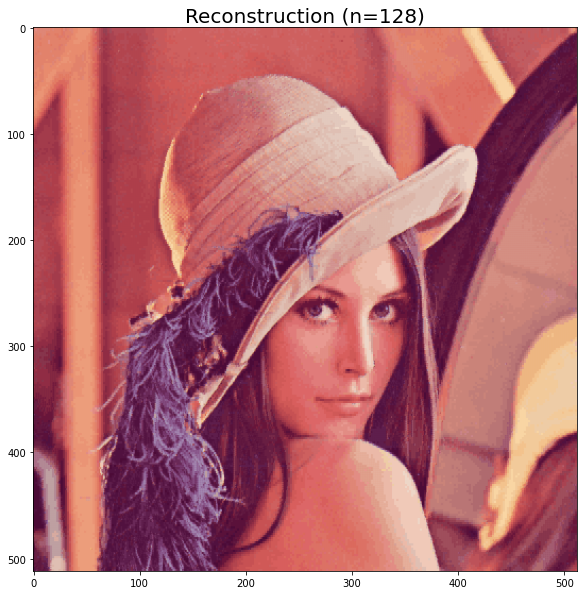

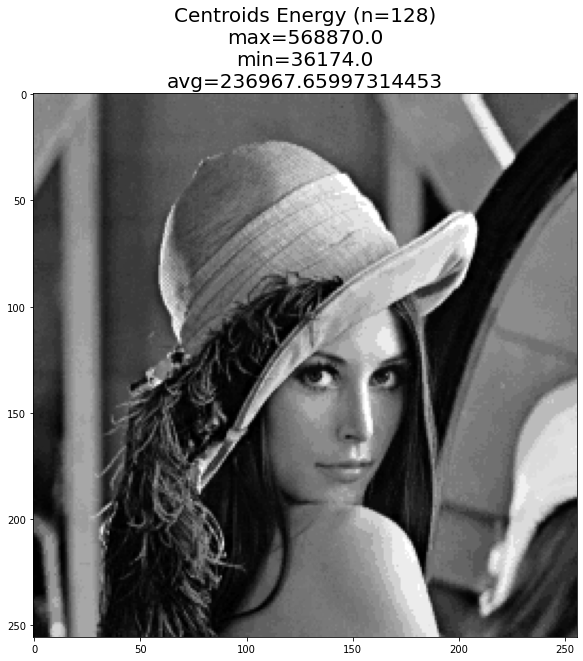

n=128, rate=0.3804117838541667 bits/pixel, distortion=   6.8


In [15]:
!ln -s ~/repos/information_theory/information.py .
import information
def RD_curve(img, range_of_N_bins):
    blocks = []
    for i in range(0, img.shape[0], block_width):
        for j in range(0, img.shape[1], block_height):
            blocks.append(np.reshape(img[i:i + block_width, j:j + block_height], block_length))
    blocks = np.asarray(blocks).astype(float)
    points = []
    for n in range_of_N_bins:
        initial_centroids = np.ones(shape=(n, block_width*block_height*N_components))*255
        for i in range(n):
            initial_centroids[i] = np.round(initial_centroids[i]/n)
        k_means = cluster.KMeans(n_clusters=n, random_state=0)
        #k_means = cluster.KMeans(init="k-means++", n_clusters=n, n_init=N_tries, algorithm="elkan")
        #k_means = cluster.KMeans(init=initial_centroids, n_init=1, n_clusters=n, random_state=0, algorithm="elkan")
        k_means.fit(blocks)
        centroids = k_means.cluster_centers_.squeeze().astype(np.uint8)
        print(centroids.shape)
        centroids_energy = np.empty(centroids.shape[0])
        print("len(centroids_energy) =", len(centroids_energy))
        counter = 0
        for i in centroids:
            #print(".")
            centroids_energy[counter] = information.energy(i)
            #print(i, centroids_energy[counter])
            #centroids_energy[counter] = YUV.from_RGB(i.astype(np.int16))
            counter += 1
        print("centroids_energy =", centroids_energy)
        argsort_centroids = np.argsort(centroids_energy)
        print("argsort_centroids =", argsort_centroids)
        #lut = np.empty_like(argsort_centroids)
        #lut[argsort_centroids] = np.arange(n)
        #print("lut =", lut)

        k = k_means.labels_.astype(np.uint8)  # bit-depth depends on number of bins! 
        lut = np.empty_like(argsort_centroids)
        lut[np.arange(n)] = argsort_centroids
        print(centroids_energy[lut])
        #for i in range(n):
        #    print(centroids_energy[lut[i]])
        
        #k = argsort_centroids[k.copy()]
        #k = lut[k]
        k = k.reshape(img.shape[0]//block_height, img.shape[1]//block_width)
        y = np.empty_like(img)
        for i in range(0, img.shape[0], block_width):
            for j in range(0, img.shape[1], block_height):
                y[i:i + block_width, j:j + block_height] = centroids[k[i//block_width,j//block_height]].reshape(block_height, block_width, N_components)
        RGB_image.show(y, f"Reconstruction (n={n})")
        print("Quantization indexes: ", np.unique(k))
        #gray_image.show_normalized(lut[k])
        #gray_image.show_normalized(k)
        gray_image.show_normalized(centroids_energy[k], f"Centroids Energy (n={n})")
        #gray_image.show_normalized(centroids_energy[lut[k]])
        #rate = gray_image.write(lut[k], "/tmp/" + str(n) + '_', 0)*8/img.size
        rate = gray_image.write(k, "/tmp/" + str(n) + '_', 0)*8/img.size
        print("code-book length =", len(centroids))
        print("code-book size =", centroids.size)
        with gzip.GzipFile("/tmp/codebook.npy.gz", "w") as f:
            np.save(file=f, arr=centroids)
        #code_book_bytes = os.path.getsize("/tmp/codebook.npy.gz")
        code_book_bytes2 = RGB_image.write(centroids.reshape(n, block_width*block_height, 3), "/tmp/codebook" + str(n) + '_', 0)
        #print("code-book bytes =", code_book_bytes)
        print("code-book bytes2 =", code_book_bytes2)        
        #rate += code_book_bytes*8/(img.shape[0]*img.shape[1])
        rate += code_book_bytes2*8/(img.shape[0]*img.shape[1])
        _distortion = distortion.RMSE(img, y)
        if not n%10:
            plt.title(f"{n}")
            plt.imshow(y, cmap=plt.cm.gray, vmin=0, vmax=256)
        plt.show()
        points.append((rate, _distortion))
        print(f"n={n:>3}, rate={rate:>7} bits/pixel, distortion={_distortion:>6.1f}")
    return points
RD_points = RD_curve(img, range_of_N_bins)

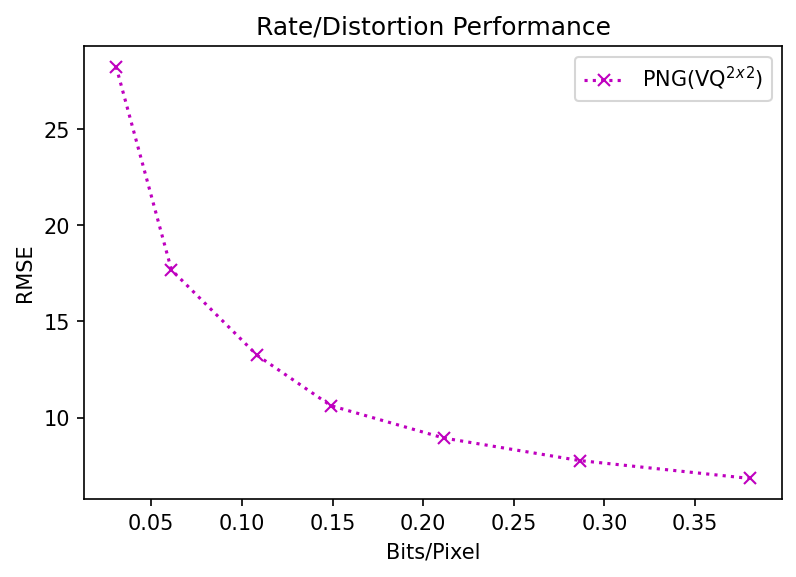

In [38]:
pylab.figure(dpi=150)
#pylab.scatter(*zip(*RD_points), label=f"VQ+PNG", s=1, marker='.')
pylab.plot(*zip(*RD_points), c='m', marker='x', label="PNG(VQ" + f"$^{block_width}$" + "$^x$" + f"$^{block_width}$" + ')', linestyle="dotted")
pylab.title(f"Rate/Distortion Performance")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("RMSE")
pylab.legend(loc='upper right')
pylab.show()

In [17]:
with open(f"VQ_2D_RGB_RD_points.txt", 'w') as f:
    for item in RD_points:
        f.write(f"{item[0]}\t{item[1]}\n")

[image_3.py:41 read() INFO] /home/vruiz/repos/MRVC/images/lena_color/000.png (512, 512, 3) uint8 len=512673 max=255 min=1
[image_3.py:90 print_stats() INFO] component=0 max=241 min=27 avg=120.56250381469727
[image_3.py:90 print_stats() INFO] component=1 max=117 min=-48 avg=37.16556930541992
[image_3.py:90 print_stats() INFO] component=2 max=33 min=-60 avg=-21.529052734375


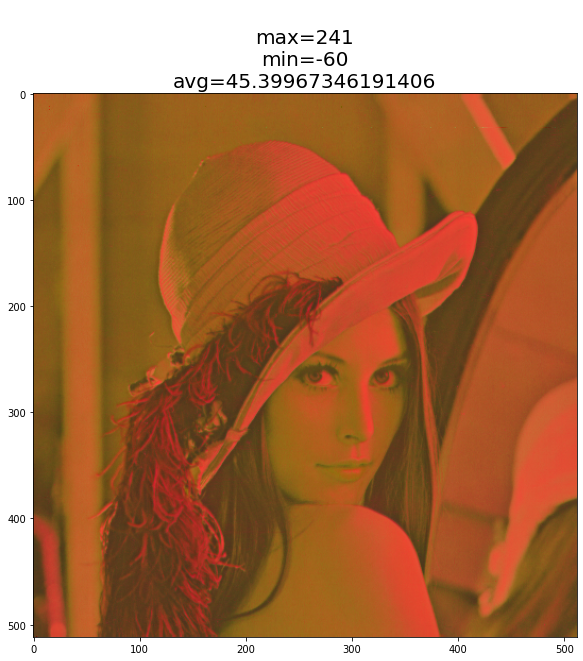

In [18]:
img = RGB_image.read(fn)
if YUV.name == "YCoCg":
    img = img.astype(np.int16)
if YUV.name =="color-DCT":
    img = img.astype(float)
img = YUV.from_RGB(img)
RGB_image.show_normalized(img)

In [19]:
block_length = block_width*block_height*N_components
np.random.seed(seed=1)  # makes the random numbers predictable
k_means = cluster.KMeans(init="k-means++", n_clusters=n_clusters, n_init=N_tries)
blocks = []
for i in range(0, img.shape[0], block_width):
    for j in range(0, img.shape[1], block_height):
        blocks.append(np.reshape(img[i:i + block_width, j:j + block_height], block_length))
blocks = np.asarray(blocks).astype(float)
k_means.fit(blocks)
centroids = k_means.cluster_centers_.squeeze().astype(np.uint16)  # the code-book
labels = k_means.labels_  # Labels of the centroids

KeyboardInterrupt: 

In [ ]:
labels = labels.reshape(img.shape[0]//block_height, img.shape[1]//block_width)
img_dequantized = np.empty_like(img)
for i in range(0, img.shape[0], block_width):
    for j in range(0, img.shape[1], block_height):
        img_dequantized[i:i + block_width, j:j + block_height] = centroids[labels[i//block_width,j//block_height]].reshape(block_height, block_width, N_components)

In [ ]:
#img_dequantized = img.copy()

In [ ]:
RGB_image.show_normalized(img_dequantized)
img_dequantized = YUV.to_RGB(img_dequantized).astype(np.uint8)
RGB_image.show(img_dequantized, "Dequantized Image")
assert len(centroids) == n_clusters
print("centroids =\n", centroids)
bits_per_block = int(math.log(n_clusters)/math.log(2))
print(f"{len(centroids)} centroids ({bits_per_block} bits/block)")
blocks_in_y = img.shape[0]//block_height
blocks_in_x = img.shape[1]//block_width
print(f"{blocks_in_y}x{blocks_in_x} blocks (vectors) in the image")
number_of_blocks = blocks_in_y*blocks_in_x
total_number_of_bits = number_of_blocks*bits_per_block
print(f"total number of output bytes = {total_number_of_bits//8}")

In [ ]:
def RD_curve(img, range_of_N_bins):
    if YUV.name == "YCoCg":
        img = img.astype(np.int16)
    YUV_img = YUV.from_RGB(img)
    blocks = []
    for i in range(0, YUV_img.shape[0], block_width):
        for j in range(0, YUV_img.shape[1], block_height):
            blocks.append(np.reshape(YUV_img[i:i + block_width, j:j + block_height], block_length))
    blocks = np.asarray(blocks).astype(float)
    points = []
    for n in range_of_N_bins:
        k_means = cluster.KMeans(init="k-means++", n_clusters=n, n_init=N_tries)
        k_means.fit(blocks)
        centroids = k_means.cluster_centers_.squeeze().astype(np.uint16)
        k = k_means.labels_.astype(np.uint16)  # bit-depth depends on number of bins! 
        k = k.reshape(YUV_img.shape[0]//block_height, YUV_img.shape[1]//block_width)
        YUV_y = np.empty_like(YUV_img)
        for i in range(0, YUV_img.shape[0], block_width):
            for j in range(0, YUV_img.shape[1], block_height):
                YUV_y[i:i + block_width, j:j + block_height] = centroids[k[i//block_width,j//block_height]].reshape(block_height, block_width, N_components)
        print("Quantization indexes: ", np.unique(k))
        rate = gray_image.write(k, "/tmp/" + str(n) + '_', 0)*8/img.size
        y = YUV.to_RGB(YUV_y).astype(np.uint8)
        _distortion = distortion.RMSE(img, y)
        RGB_image.show(y)
        if not n%10:
            plt.title(f"{n}")
            plt.imshow(y, cmap=plt.cm.gray, vmin=0, vmax=256)
            plt.show()
        points.append((rate, _distortion))
        print(f"n={n:>3}, rate={rate:>7} bits/pixel, distortion={_distortion:>6.1f}")
    return points

img = RGB_image.read(fn)
RD_points_YUV = RD_curve(img, range_of_N_bins)

In [ ]:
pylab.figure(dpi=150)
#pylab.scatter(*zip(*RD_points), label=f"VQ+PNG", s=1, marker='.')
pylab.plot(*zip(*RD_points), label=f"VQ(2D+RGB)+PNG", linestyle="dotted")
pylab.plot(*zip(*RD_points_YUV), label=f"VQ(2D+{YUV.name})+PNG", linestyle="dotted")
pylab.title(f"Rate/Distortion Performance")
pylab.xlabel("Bits/Pixel")
pylab.ylabel("RMSE")
pylab.legend(loc='upper right')
pylab.show()

## Conclusions

1. VQ can remove at the same time both, the color and the spatial redundancy.

In [ ]:
import time
while True:
    time.sleep(1)